In [24]:
import numpy as np
import pandas as pd
import xarray as xr

red_arr = np.arange(48).reshape(4,4,3)
green_arr = np.arange(48).reshape(4,4,3) + 100
blue_arr = np.arange(48).reshape(4,4,3) + 200

clrs = ['red', 'green', 'blue']

cloudmask_arr = np.random.rand(4,4,3)
cloudmask_arr[cloudmask_arr > .8] == 1
cloudmask_arr[cloudmask_arr <= .8] == 0

change = np.random.rand(4,4)

x_map = np.array([list(range(100025, 100125, 25))] * 4)
y_map = np.array([list(range(456025, 456125, 25))] * 4).T

dates = pd.date_range('1-1-2001', '4-4-2001', freq='M')


ds = xr.Dataset({'red': (['x','y','date'], red_arr),
                 'green': (['x','y','date'], green_arr),
                 'blue': (['x','y','date'], blue_arr)},
               coords = {'x_map': (['x','y'], x_map),
                        'y_map': (['x','y'], y_map),
                         'date': dates})
ds

<xarray.Dataset>
Dimensions:  (date: 3, x: 4, y: 4)
Coordinates:
    x_map    (x, y) int64 100025 100050 100075 100100 100025 100050 100075 ...
    y_map    (x, y) int64 456025 456025 456025 456025 456050 456050 456050 ...
  * date     (date) datetime64[ns] 2001-01-31 2001-02-28 2001-03-31
Dimensions without coordinates: x, y
Data variables:
    red      (x, y, date) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
    green    (x, y, date) int64 100 101 102 103 104 105 106 107 108 109 110 ...
    blue     (x, y, date) int64 200 201 202 203 204 205 206 207 208 209 210 ...

In [2]:
import collections
test = collections.OrderedDict()
test['hi'] = 123
test['bye'] = 456
for i in test.values():
    print(i)

123
456


In [30]:
import numpy as np

np.arange(18).reshape(3,3,2).T.shape

(2, 3, 3)

In [23]:
xr.DataArray(change, coords = [(x_map,y_map)])



ValueError: coords is not dict-like, but it has 1 items, which does not match the 2 dimensions of the data

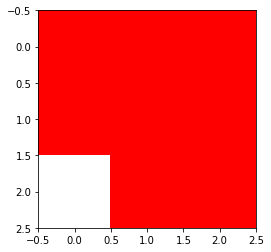

In [15]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

bg = np.zeros((3,3,4), dtype = np.float32)
bg[:,:,0] = 1
bg[:,:,3] = 1
bg[2,0,3] = 0

# top = np.zeros((3,3), dtype = np.float32)
# top[0,0] = 1
# top[1,1] = 1
# top[2,2] = 2
# top[top == 0] = np.nan
imshow(bg)
# imshow(top)

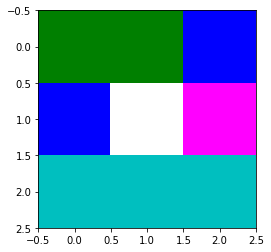

In [8]:
% matplotlib inline
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl


test = np.zeros((3,3), dtype = np.float32)
test[:] = np.arange(1,10).reshape(3,3)
test[1,1] = np.nan

cmap = colors.ListedColormap(['g','b','fuchsia', 'c'])
# bounds = [1,2,3,4]
# norm = colors.BoundaryNorm(bounds, cmap.N)

plt.imshow(test, cmap)

In [ ]:
% matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets  import RectangleSelector

xdata = np.linspace(0,9*np.pi, num=301)
ydata = np.sin(xdata)

fig, ax = plt.subplots()
line, = ax.plot(xdata, ydata)


# def line_select_callback(eclick, erelease):
#     x1, y1 = eclick.xdata, eclick.ydata
#     x2, y2 = erelease.xdata, erelease.ydata

#     rect = plt.Rectangle( (min(x1,x2),min(y1,y2)), np.abs(x1-x2), np.abs(y1-y2) )
#     ax.add_patch(rect)


rs = RectangleSelector(ax, line_select_callback,
                       drawtype='box', useblit=False, button=[1], 
                       minspanx=5, minspany=5, spancoords='pixels', 
                       interactive=True)

plt.show()

In [ ]:
% matplotlib notebook
from matplotlib.widgets import  RectangleSelector
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

def onselect(eclick, erelease):
  # 'eclick and erelease are matplotlib events at press and release'
    print(' startposition : (%f, %f)' % (eclick.xdata, eclick.ydata))
    print(' endposition   : (%f, %f)' % (erelease.xdata, erelease.ydata))
    print(' used button   : ', eclick.button)

def toggle_selector(event):
    print(' Key pressed.')
    if event.key in ['Q', 'q'] and toggle_selector.RS.active:
        print(' RectangleSelector deactivated.')
        toggle_selector.RS.set_active(False)
    if event.key in ['A', 'a'] and not toggle_selector.RS.active:
        print(' RectangleSelector activated.')
        toggle_selector.RS.set_active(True)

x = np.arange(100)/(99.0)
y = np.sin(x)
fig = plt.figure
ax = plt.subplot(111)
ax.plot(x,y)

toggle_selector.RS = RectangleSelector(ax, onselect, drawtype='line')
connect('key_press_event', toggle_selector)
plt.show()

In [ ]:
% matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

X = np.random.rand(100, 1000)
xs = np.mean(X, axis=1)
ys = np.std(X, axis=1)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('click on point to plot time series')
line, = ax.plot(xs, ys, 'o', picker=5)  # 5 points tolerance


def onpick(event):

    if event.artist!=line: return True

    N = len(event.ind)
    if not N: return True


    figi = plt.figure()
    for subplotnum, dataind in enumerate(event.ind):
        ax = figi.add_subplot(N,1,subplotnum+1)
        ax.plot(X[dataind])
        ax.text(0.05, 0.9, 'mu=%1.3f\nsigma=%1.3f'%(xs[dataind], ys[dataind]),
                transform=ax.transAxes, va='top')
        ax.set_ylim(-0.5, 1.5)
    figi.show()
    return True

fig.canvas.mpl_connect('pick_event', onpick)

plt.show()

In [ ]:
% matplotlib inline
import matplotlib.pyplot as plt

plt.plot(2,4, color = 'black', marker='+')

In [ ]:
from matplotlib.widgets import RectangleSelector
import numpy as np
import matplotlib.pyplot as plt


def line_select_callback(eclick, erelease):
    'eclick and erelease are the press and release events'
    x1, y1 = eclick.xdata, eclick.ydata
    x2, y2 = erelease.xdata, erelease.ydata


fig, current_ax = plt.subplots()                 # make a new plotting range
N = 100000                                       # If N is large one can see
x = np.linspace(0.0, 10.0, N)                    # improvement by use blitting!

plt.plot(x, +np.sin(.2*np.pi*x), lw=3.5, c='b', alpha=.7)  # plot something
plt.plot(x, +np.cos(.2*np.pi*x), lw=3.5, c='r', alpha=.5)
plt.plot(x, -np.sin(.2*np.pi*x), lw=3.5, c='g', alpha=.3)

# drawtype is 'box' or 'line' or 'none'
toggle_selector.RS = RectangleSelector(current_ax, line_select_callback,
                                       drawtype='box', useblit=True,
                                       button=[1, 3],  # don't use middle button
                                       minspanx=5, minspany=5,
                                       spancoords='pixels',
                                       interactive=True)
# plt.connect('key_press_event', toggle_selector)
plt.show()

In [ ]:
x1

In [ ]:
from matplotlib.widgets import RectangleSelector
import numpy as np
import matplotlib.pyplot as plt


def line_select_callback(eclick, erelease):
    'eclick and erelease are the press and release events'
    x1, y1 = eclick.xdata, eclick.ydata
    x2, y2 = erelease.xdata, erelease.ydata
    print("(%3.2f, %3.2f) --> (%3.2f, %3.2f)" % (x1, y1, x2, y2))
    print(" The button you used were: %s %s" % (eclick.button, erelease.button))


def toggle_selector(event):
    print(' Key pressed.')
    if event.key in ['Q', 'q'] and toggle_selector.RS.active:
        print(' RectangleSelector deactivated.')
        toggle_selector.RS.set_active(False)
    if event.key in ['A', 'a'] and not toggle_selector.RS.active:
        print(' RectangleSelector activated.')
        toggle_selector.RS.set_active(True)


fig, current_ax = plt.subplots()                 # make a new plotting range
N = 100000                                       # If N is large one can see
x = np.linspace(0.0, 10.0, N)                    # improvement by use blitting!

plt.plot(x, +np.sin(.2*np.pi*x), lw=3.5, c='b', alpha=.7)  # plot something
plt.plot(x, +np.cos(.2*np.pi*x), lw=3.5, c='r', alpha=.5)
plt.plot(x, -np.sin(.2*np.pi*x), lw=3.5, c='g', alpha=.3)

print("\n      click  -->  release")

# drawtype is 'box' or 'line' or 'none'
toggle_selector.RS = RectangleSelector(current_ax, line_select_callback,
                                       drawtype='box', useblit=True,
                                       button=[1, 3],  # don't use middle button
                                       minspanx=5, minspany=5,
                                       spancoords='pixels',
                                       interactive=True)
plt.connect('key_press_event', toggle_selector)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import is_interactive
from matplotlib.path import Path
from matplotlib.widgets import LassoSelector, RectangleSelector
import numpy as np

def path_bbox(p):
    """
    Return rectangular bounding box of given path.
    Parameters
    ----------
    p : array_like
        Array of vertices with shape Nx2.
    Returns
    -------
    bbox : array_like
        Array of bounding box vertices with shape 4x2.
    """

    assert p.ndim == 2
    assert p.shape[1] == 2
    
    ix_min = p[:, 0].argmin()
    ix_max = p[:, 0].argmax()
    iy_min = p[:, 1].argmin()
    iy_max = p[:, 1].argmax()

    return np.array([[p[ix_min, 0], p[iy_min, 1]],
                     [p[ix_min, 0], p[iy_max, 1]],
                     [p[ix_max, 0], p[iy_max, 1]],
                     [p[ix_max, 0], p[iy_min, 1]]])
                     
def imshow_select(data, selector='lasso', bbox=False):
    """
    Display array as image with region selector.
    
    Parameters
    ----------
    data : array_like
        Array to display.
    selector : str
        Region selector. For `lasso`, use `LassoSelector`; for `rectangle`,
        use `RectangleSelector`.
    bbox : bool
        If True, only return array within rectangular bounding box of selected region.
        Otherwise, return array with same dimensions as `data` such that selected region 
        contains the corresponding values from `data` and the remainder contains 0.
    Returns
    -------
    region : array_like
        Data for selected region.
    mask : array_like
        Boolean mask with same shape of `data` for selecting the returned region from `data`.
    """
    
    interactive = is_interactive()
    if not interactive:
        plt.ion()
    fig = plt.figure()
    ax = fig.gca()
    ax.imshow(data)
    
    x, y = np.meshgrid(np.arange(data.shape[1], dtype=int),
                       np.arange(data.shape[0], dtype=int))
    pix = np.vstack((x.flatten(), y.flatten())).T

    # Store data in dict value to permit overwriting by nested
    # functions in Python 2.7:
    selected = {}
    selected['data'] = np.zeros_like(data)
    selected['mask'] = np.tile(False, data.shape)
    
    def _onselect_lasso(verts):
        verts = np.array(verts)
        p = Path(verts)
        ind = p.contains_points(pix, radius=1)
        selected['data'].flat[ind] = data.flat[ind]
        selected['mask'].flat[ind] = True
        if bbox:
            b = path_bbox(verts)
            selected['data'] = selected['data'][int(min(b[:, 1])):int(max(b[:, 1])),
                                                int(min(b[:, 0])):int(max(b[:, 0]))]
            
    def _onselect_rectangle(start, end):
        verts = np.array([[start.xdata, start.ydata],
                          [start.xdata, end.ydata],
                          [end.xdata, end.ydata],
                          [end.xdata, start.ydata]], int)
        p = Path(verts)
        ind = p.contains_points(pix, radius=1)
        selected['data'].flat[ind] = data.flat[ind]
        selected['mask'].flat[ind] = True
        if bbox:
            b = path_bbox(verts)
            selected['data'] = selected['data'][min(b[:, 1]):max(b[:, 1]),
                                                min(b[:, 0]):max(b[:, 0])]

    name_to_selector = {'lasso': LassoSelector,
                        'rectangle': RectangleSelector}
    selector = name_to_selector[selector]
    onselect_dict = {LassoSelector: _onselect_lasso,
                     RectangleSelector: _onselect_rectangle}
    kwargs_dict = {LassoSelector: {},
                   RectangleSelector: {'interactive': True}}
    
    lasso = selector(ax, onselect_dict[selector], **kwargs_dict[selector])
    input('Press Enter when done')
    lasso.disconnect_events()
    if not interactive:
        plt.ioff()
    return selected['data'], selected['mask']


from skimage.data import coins
data = coins()
selected, mask = imshow_select(data, 'lasso', True)
plt.imsave('selected.png', selected)
plt.imsave('mask.png', mask)

<IPython.core.display.Javascript object>


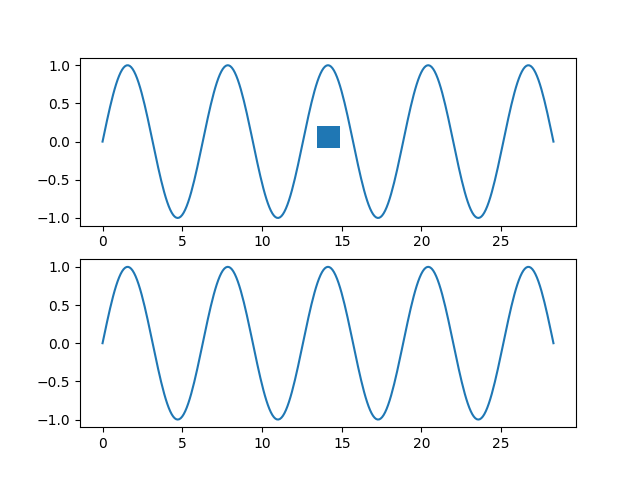

In [10]:
% matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.widgets import LassoSelector, RectangleSelector

xdata = np.linspace(0,9*np.pi, num=301)
ydata = np.sin(xdata)


# def testDraw():
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(xdata, ydata)
ax2 = fig.add_subplot(212)
ax2.plot(xdata, ydata)
plt.draw()

def line_select_callback(eclick, erelease):
    x1, y1 = eclick.xdata, eclick.ydata
    x2, y2 = erelease.xdata, erelease.ydata

    rect = matplotlib.patches.Rectangle((min(x1,x2),min(y1,y2)), np.abs(x1-x2), np.abs(y1-y2))
    
    ax1 = plt.subplot(211)
    ax1.clear()
    ax1.plot(xdata, ydata)
    ax1.add_patch(rect)    

    ax2 = plt.subplot(212)
    ax2.clear()
    ax2.plot(xdata, ydata)
    ax2.add_patch(rect)
    plt.draw()
    
rs = RectangleSelector(ax1, line_select_callback,
                       drawtype='box', useblit=False, button=[1], 
                       minspanx=5, minspany=5, spancoords='pixels', 
                       interactive=False)




# testDraw()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets  import RectangleSelector

xdata = np.linspace(0,9*np.pi, num=301)

ydata = np.sin(xdata)

def drawTest():
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    ax1.plot(xdata, ydata)
#     ax2 = fig.add_subplot(212)
#     ax2.plot(xdata, ydata)
#     plt.draw()


    def line_select_callback(eclick, erelease):
        x1, y1 = eclick.xdata, eclick.ydata
        x2, y2 = erelease.xdata, erelease.ydata

        rect = plt.Rectangle((min(x1,x2),min(y1,y2)), np.abs(x1-x2), np.abs(y1-y2) )
        ax.add_patch(rect)
        plt.draw()

    rs = RectangleSelector(ax1, line_select_callback,
                           drawtype='box', useblit=False, button=[1], 
                           minspanx=5, minspany=5, spancoords='pixels', 
                           interactive=True)

        

drawTest()

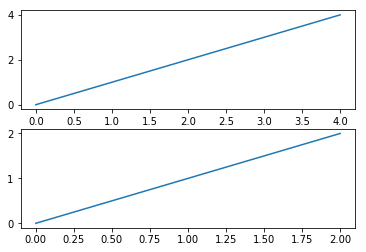

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
plt.subplot(211)
plt.plot(range(5))
test = plt.gca()
plt.subplot(212)
plt.plot(range(3))
plt.show()

In [17]:
test in list(enumerate(fig.axes))

False

In [6]:
fig = plt.figure()
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

[(0, <matplotlib.axes._subplots.AxesSubplot at 0x7f8cdff994e0>),
 (1, <matplotlib.axes._subplots.AxesSubplot at 0x7f8cdfde5f98>)]

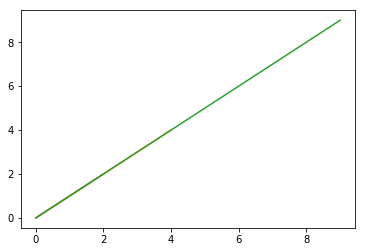

In [11]:
def makeaxes(n):
    plt.plot(range(n))
    ax = plt.gca()
    return ax

fig = plt.figure()

axs = []
for n in [3,5,10]:
    axs.append(makeaxes(n))
plt.draw()